# MOTIVATION

**Exemple 1 :**
```
library(umap)
...
...
Error: Detected umap-learn 0.5.2 but last supported version is 0.4
```
(résolu depuis peu)

**Exemple 2 :**

https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet_v2/EfficientNetV2B3

```
TensorFlow > API > TensorFlow Core v2.8.0 > Python

tf.keras.applications.efficientnet_v2.EfficientNetV2B3
```

https://rdrr.io/github/rstudio/keras/man/application_efficientnet.html

```
application_efficientnet_b3(
  include_top = TRUE,
  weights = "imagenet",
  input_tensor = NULL,
  input_shape = NULL,
  pooling = NULL,
  classes = 1000L,
  classifier_activation = "softmax",
  ...
)
```

**Exemple 3 :**
```
> library(packagefinder)
> findPackage("cleanlab")
Your are searching packages for the term 'cleanlab'

Please wait while index is being searched...

No results found.
```

# INSTALLER PYTHON et SES MODULES

### Solution 1 - Utiliser `pip`

<img src="img/python1.jpg" alt="isolated" width="400"/>
<img src="img/python3.jpg" alt="isolated" width="400"/>
<img src="img/pip1.jpg" alt="isolated" width="400"/>
<img src="img/pip2.jpg" alt="isolated" width="600"/>

### Solution 2 - Utiliser `conda`


https://rstudio.github.io/reticulate/articles/python_packages.html

<img src="img/conda.jpg" alt="isolated" width="600"/>


# LANCER RETICULATE

In [18]:
library(reticulate)

In [19]:
Sys.which("python")

python 
"/usr/bin/python"

In [20]:
py_config()

python:         /usr/bin/python3
libpython:      /usr/lib/libpython3.10.so
pythonhome:     //usr://usr
version:        3.10.1 (main, Dec 18 2021, 23:53:45) [GCC 11.1.0]
numpy:          /usr/lib/python3.10/site-packages/numpy
numpy_version:  1.21.5

python versions found: 
 /usr/bin/python3
 /usr/bin/python

# EXECUTER DES LIGNES DE `PYTHON` depuis `R`

In [21]:
py_run_string("x = 4")
py$x

[1] 4

In [22]:
py_run_file("scripts/dummy.py")
py$y

[1] 5

In [23]:
source_python("scripts/add.py")
pyadd(4,5)
pyadd(py$x,py$y)

[1] 9

[1] 9

# CHARGER DES MODULES PYTHON (avec la bonne syntaxe...)

Attention, remplacer l'utilisation du `.` en `Python` par celle du `$` en `R/reticulate` 

In [24]:
math <- import("math")
math$log(2.7182)

[1] 0.9999699

In [25]:
np <- import("numpy")
np$argsort(c(6.3,1.5,4.3))

[1] 1 2 0

In [26]:
np$random$normal()

[1] 1.490898

# CONVERSION DE TYPE entre `Python` et `R`
https://rstudio.github.io/reticulate/articles/calling_python.html


| R | Python | Examples |
| --- | --- | --- |
| Single-element vector | Scalar | `1, 1L, TRUE, "foo"`
| Multi-element vector | List | `c(1.0, 2.0, 3.0), c(1L, 2L, 3L)`
| List of multiple types | Tuple | `list(1L, TRUE, "foo")`
| Named list | Dict | `list(a = 1L, b = 2.0), dict(x = x_data)`
| Matrix/Array| NumPy ndarray | `matrix(c(1,2,3,4), nrow = 2, ncol = 2)`
| Data Frame | Pandas DataFrame | `data.frame(x = c(1,2,3), y = c("a", "b", "c"))`
| NULL, TRUE, FALSE | None, True, False | `NULL, TRUE, FALSE`

### Depuis `Python` vers `R`
Par defaut, quand des objets `Python` sont retournés vers R, ils sont convertis dans leur type equivalent `R`.

In [27]:
py_run_string("import numpy; ar = numpy.zeros(5)")
py$ar
class(py$ar)

[1] 0 0 0 0 0

[1] "array"

In [28]:
# import numpy and specify automatic Python to R conversion
np <- import("numpy")
ar <- np$array(c(1:4))
class(ar)

[1] "array"

In [29]:
## import numpy and specify no automatic Python to R conversion, to keep playing in Python
np <- import("numpy", convert = FALSE)
npar <- np$array(c(1:4))
class(npar)

[1] "numpy.ndarray"         "python.builtin.object"

In [30]:
ar <- py_to_r(npar)
class(ar)

[1] "array"

In [31]:
## ATTENTION
print(npar[0])
print(npar[1])
print(ar[0])

1
2
numeric(0)


### Depuis `R` vers `Python`
La plupart du temps, la conversion est automatique. Mais attention...


In [32]:
## ATTENTION
source_python("scripts/range.py")
pyrange(5)

ERROR: Error in py_call_impl(callable, dots$args, dots$keywords): TypeError: 'float' object cannot be interpreted as an integer

Detailed traceback:
  File "<string>", line 2, in pyrange



In [33]:
pyrange(5L)

[1] 0 1 2 3 4

In [34]:
filename <- "img/olivier.jpg"
py <- py_run_string(paste0("
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img(\"", filename ,"\", target_size=(300,300,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)")
)
dim(py$x)
class(py$x)

[1]   1 300 300   3

[1] "array"

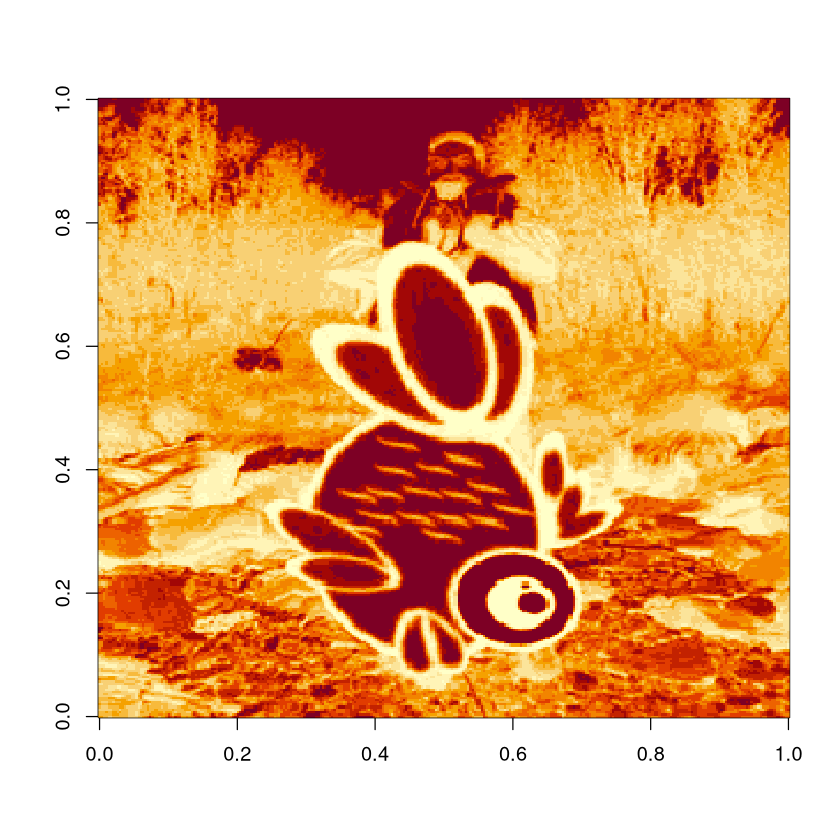

In [35]:
image(t(py$x[1,300:1,1:300,1]))

# UMAP

<img src="img/umap.jpg" alt="isolated" width="400"/>

<img src="img/umapbotella.jpg" width="500"/> (source: Botella et al, MEE 2021)

Cf. `How UMAP Works` (https://umap-learn.readthedocs.io/en/latest/how_umap_works.html)

#### Exemple 1 (Version Python)
```
import numpy as np
import matplotlib.pyplot as plt
import umap

np.random.seed(42)
data = np.random.rand(800, 4)

fit = umap.UMAP()
u = fit.fit_transform(data)

plt.scatter(u[:,0], u[:,1], c=data)
plt.title('UMAP embedding of random colours');
```

#### Exemple 2 (Version R)

In [36]:
library(reticulate)
np <- import("numpy")
umap <- import("umap")

In [37]:
np$random$seed(42)

ERROR: Error in py_call_impl(callable, dots$args, dots$keywords): TypeError: Cannot cast scalar from dtype('float64') to dtype('int64') according to the rule 'safe'

Detailed traceback:
  File "mtrand.pyx", line 246, in numpy.random.mtrand.RandomState.seed
  File "_mt19937.pyx", line 166, in numpy.random._mt19937.MT19937._legacy_seeding
  File "_mt19937.pyx", line 186, in numpy.random._mt19937.MT19937._legacy_seeding



In [38]:
np$random$seed(42L) 

In [39]:
data <- np$random$rand(800L, 4L)
np$shape(data)

[[1]]
[1] 800

[[2]]
[1] 4

In [40]:
fit <-umap$UMAP()
u <- fit$fit_transform(data)

In [41]:
plt <- import("matplotlib.pyplot")
plt$scatter(u[,1], u[,2], c=data)
plt$title('UMAP embedding of random colours');
plt$show()

<matplotlib.collections.PathCollection>

Text(0.5, 1.0, 'UMAP embedding of random colours')

#### Exemple 2

In [42]:
library(reticulate)
np <- import("numpy")
umap <- import("umap")

 num [1:300, 1:100] 0 50 100 80 80 20 0 0 80 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:300] "num1" "num2" "num3" "num4" ...
  ..$ : chr [1:100] "SP1" "SP2" "SP3" "SP4" ...


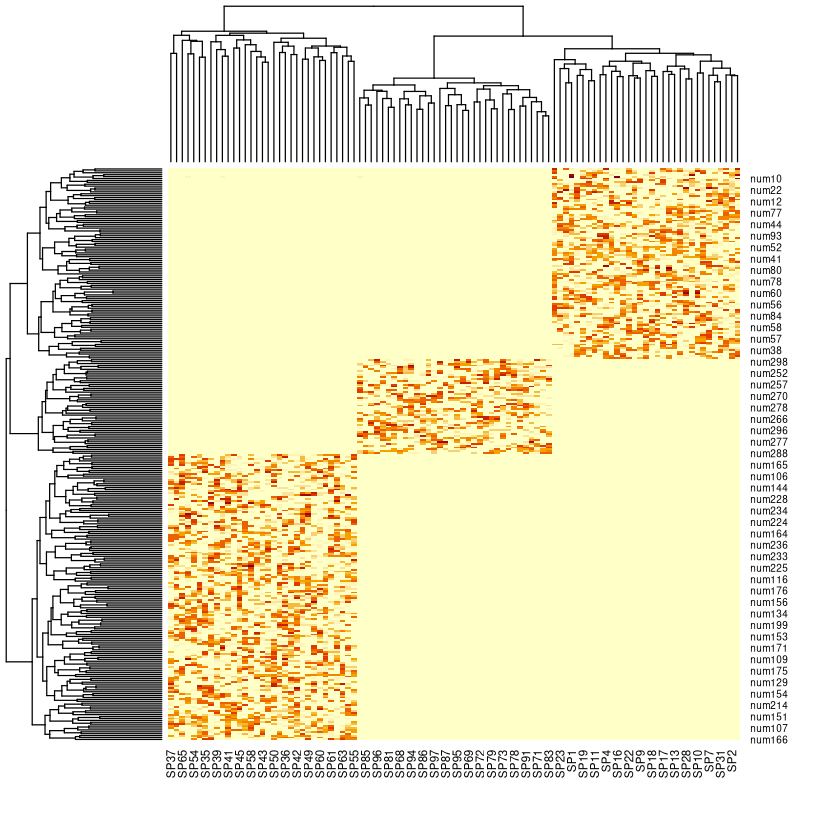

In [43]:
load("data/releves.rda")
str(releves)
heatmap(releves)

In [44]:
fit <- umap$UMAP(n_neighbors=25, n_components=2, metric='braycurtis')

In [45]:
fit <- umap$UMAP(n_neighbors=25L, n_components=2L, metric='braycurtis')

In [46]:
u <- fit$fit_transform(np$array(releves))
str(u)

 num [1:300, 1:2] 14,1 12,6 13,3 13,8 13,5 ...


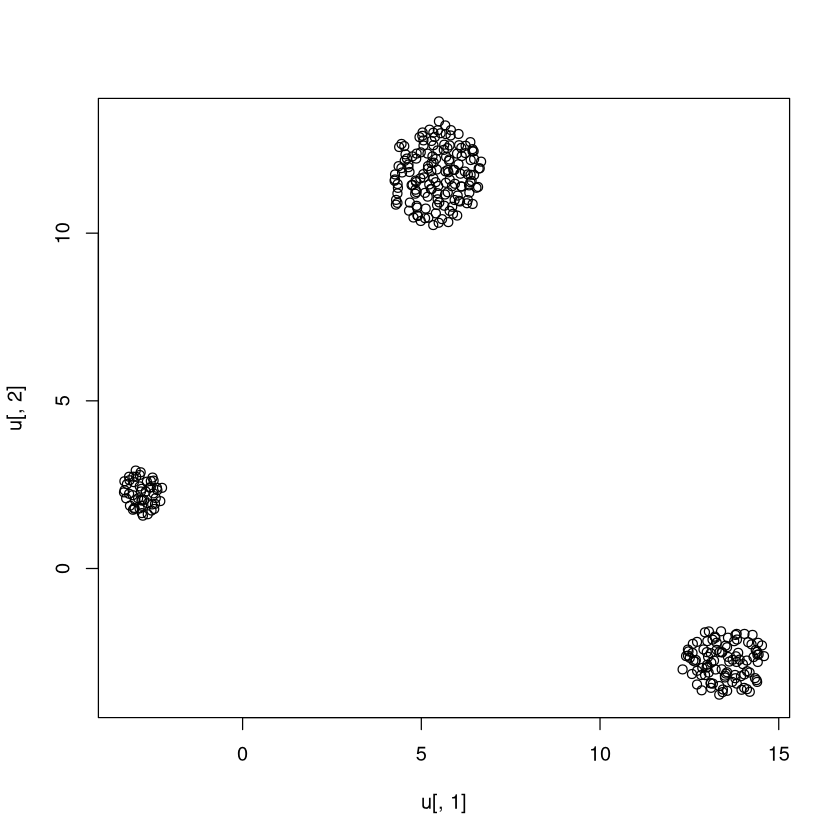

In [47]:
plot(u[,1], u[,2])